In [1]:
import pandas as pd
import numpy as np
import scipy as sp 
import random
import matplotlib.pyplot as plt
import mibian as mb
import math as m

Симулируем траектории цены базового актива (акция без дивидендов)

In [30]:
n = 365
it = 10000
r = 0.1
v = 5
S0 = 50
t = [i/365 for i in range(n)]
e = [[random.normalvariate(0,1) for i in range(1, n)] for i in range(it)]
S = [[S0] + [0]*(n-1) for i in range(it)]

Получаем оценку на основе среднего из траекторий

In [31]:
for j in range(it):
    for i in range(1, n):
        S[j][i] = (1+r*(t[i]-t[i-1])+v*(t[i]-t[i-1])**0.5*e[j][i-1])*S[j][i-1] 
Smc = np.sum(np.array(S), axis = 0)/it
    

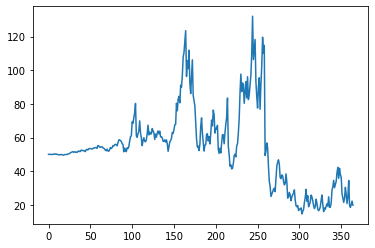

In [32]:
plt.plot(np.array(t)*365, Smc)
plt.show()

Далее надо найти implied volatility для страйков (зададим сами их кол-во и инетрвалы). Далее еще создаю синтетичесский массив для использования пакета mibian. Я делаю всё для нулевого периода времени, поигравшись с массивами можно сделать для любого периода времени, но у меня сядет ноутбук.

In [26]:
m = 40 ##количество страйков
K = [Smc[0] - (Smc[n-1] - Smc[0])/2 + j*2*(Smc[n-1]-Smc[0])/m for j in range(m)]
BS_env_vol = [0 for j in range(len(K))]
for k in range(len(K)):
        BS_env_vol[k] = mb.BS([Smc[0], K[k], r, (n-np.array(t)*365)[0]], volatility = v/it**0.5)

[63.57033341343018, 62.21330007208716, 60.85626673074414, 59.49923338940112, 58.14220004805811, 56.78516670671509, 55.42813336537207, 54.07110002402905, 52.71406668268603, 51.35703334134301, 50.0, 48.64296665865698, 47.28593331731396, 45.92889997597094, 44.57186663462792, 43.214833293284904, 41.857799951941885, 40.50076661059887, 39.143733269255854, 37.786699927912835, 36.429666586569816, 35.0726332452268, 33.715599903883785, 32.35856656254076, 31.00153322119774, 29.644499879854727, 28.28746653851171, 26.93043319716869, 25.57339985582567, 24.216366514482658, 22.859333173139632, 21.50229983179662, 20.1452664904536, 18.78823314911058, 17.431199807767563, 16.074166466424543, 14.717133125081531, 13.360099783738505, 12.003066442395486, 10.646033101052474]


In [27]:
c = [0 for j in range(len(K))]
for k in range(len(K)):
        c[k] = BS_env_vol[k].callPrice
p = [0 for j in range(len(K))]
for k in range(len(K)):
        p[k] = BS_env_vol[k].putPrice

In [30]:
call = np.array(c)
print(call)
put = np.array(p)
print(put)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.52887057e-02 1.38101574e+00
 2.73738002e+00 4.09374431e+00 5.45010859e+00 6.80647288e+00
 8.16283716e+00 9.51920145e+00 1.08755657e+01 1.22319300e+01
 1.35882943e+01 1.49446586e+01 1.63010229e+01 1.76573872e+01
 1.90137514e+01 2.03701157e+01 2.17264800e+01 2.30828443e+01
 2.44392086e+01 2.57955729e+01 2.71519371e+01 2.85083014e+01
 2.98646657e+01 3.12210300e+01 3.25773943e+01 3.39337586e+01
 3.52901228e+01 3.66464871e+01 3.80028514e+01 3.93592157e+01]
[1.35389914e+01 1.21826271e+01 1.08262628e+01 9.46989854e+00
 8.11353425e+00 6.75716997e+00 5.40080568e+00 4.04444140e+00
 2.68807711e+00 1.33171283e+00 6.37250390e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000

In [31]:
strike = np.array(K)
strike

array([63.57033341, 62.21330007, 60.85626673, 59.49923339, 58.14220005,
       56.78516671, 55.42813337, 54.07110002, 52.71406668, 51.35703334,
       50.        , 48.64296666, 47.28593332, 45.92889998, 44.57186663,
       43.21483329, 41.85779995, 40.50076661, 39.14373327, 37.78669993,
       36.42966659, 35.07263325, 33.7155999 , 32.35856656, 31.00153322,
       29.64449988, 28.28746654, 26.9304332 , 25.57339986, 24.21636651,
       22.85933317, 21.50229983, 20.14526649, 18.78823315, 17.43119981,
       16.07416647, 14.71713313, 13.36009978, 12.00306644, 10.6460331 ])

Тут считаем implied volatility строим график

In [32]:
IV = [0 for i in range(len(K))]
for k in range(len(K)):
    if call[k] > 0.0001: 
        IV[k] = mb.BS([Smc[0], K[k], r, (n-np.array(t)*365)[0]], callPrice = call[k]).impliedVolatility
        
for k in range(len(K)):
    if put[k] > 0.0001: 
        IV[k] = mb.BS([Smc[0], K[k], r, (n-np.array(t)*365)[0]], putPrice = put[k]).impliedVolatility        

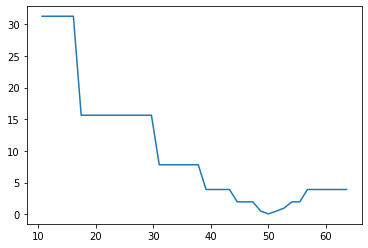

In [33]:
plt.plot(K, IV)